#### 1. Packages Import and Environment Set Up

Environment Set Up:
- pip install sklearn
- pip install quandl
- pip install pandas
- pip install cvxopt

In [4]:
import pandas as pd 
import math 
import quandl
import numpy as np
#from sklearn import preprocessing, cross_validation, svm
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import random
from IPython.display import Image
from IPython.core.display import HTML 
from math import * 
from numpy import linalg
import cvxopt
import cvxopt.solvers
import os

# (A) Regression Problem

#### a. Features and Labels

In [5]:
# Pattern Recognition
# Since it is a regression problem, remove variables with high correlation with each other

In [7]:
df = quandl.get("WIKI/GOOGL")

In [8]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [9]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
#missing data will be treated as outliers in the dataset 
df.fillna(value=-99999, inplace=True)
#math.ceil will round all no to nearest whole no
forecast_out = int(math.ceil(0.01 * len(df)))
#label price for each row will be the adjusted close price 10 days into the future 
df['label'] = df[forecast_col].shift(-forecast_out)

In [10]:
#drop null information from the dataframe
df.dropna(inplace=True)

In [11]:
print(df.tail(20))

            Adj. Close    HL_PCT  PCT_change  Adj. Volume    label
Date                                                              
2018-01-08     1114.21  0.822107    0.288929    1148958.0  1103.92
2018-01-09     1112.79  0.920210   -0.505168    1335995.0  1071.41
2018-01-10     1110.14  0.792693    0.283650    1027781.0  1084.14
2018-01-11     1111.88  0.752779   -0.038658    1102461.0  1094.76
2018-01-12     1130.65  2.059877    1.851185    1914460.0  1100.90
2018-01-16     1130.70  1.965154   -0.842753    1783881.0  1115.04
2018-01-17     1139.10  1.389694    0.241121    1353097.0  1129.38
2018-01-18     1135.97  1.419932   -0.296660    1333633.0  1160.84
2018-01-19     1143.50  0.986445    0.480655    1418376.0  1165.93
2018-01-22     1164.16  2.152625    1.778252    1437954.0  1139.91
2018-01-23     1176.17  0.957345    0.474108    1832126.0  1148.89
2018-01-24     1171.29  1.677637   -1.155294    1818182.0  1150.61
2018-01-25     1182.14  1.113235    0.121114    1398961.0  113

#### b. Training and Testing

In [12]:
#Define Label and Features 
x = np.array(df.drop(['label'],1))
y = np.array(df['label'])

# Scale x 
# To improve accuracy, you usually wish to ensure that you scale the data to bet -1 to +1 
X = preprocessing.scale(x)
y = np.array(df['label'])

# training set of features, testing set of features, training set of labels, and testing set of labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### How do we choose the right estimator? 
https://scikit-learn.org/stable/tutorial/machine_learning_map/

### Support Vector Regression 
#### https://medium.com/coinmonks/support-vector-regression-or-svr-8eb3acf6d0ff

In [13]:
# Chosen Classifier: Support Vector Regression from Scikit-Learn's svm package
# SVM Packages: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
clf = svm.SVR()

# Fit in classifier with the features and labels
clf.fit(X_train, y_train)

# Test the classifer by finding the confidence
confidence = clf.score(X_test, y_test)
print(confidence)

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8069270488613455


### Linear Regression

In [14]:
clf = LinearRegression()
clf = LinearRegression(n_jobs=-1)  #Choose all available threads

# Try out different combination of kernel to transform against the data (i.e. grossly simplify the data)
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)

linear 0.9745320492827182


/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


poly 0.6558130726689052


/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


rbf 0.8069270488613455


/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


sigmoid 0.8948138861773418


Possible for Threading: n_jobs, you have an algorithm that can be threaded for high performance
Impossible for Threading: lack of n_jobs

- if you are processing massive amounts of data, or you need to process medium data but at a very high rate of speed, then you would want something threaded. 

In [15]:
# Final Chosen Classifier
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.9758165722735883


#### c. Forecasting and Predicting

In [16]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
# X_lately will only containt the most reent features which will be predicted against
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [17]:
df.dropna(inplace=True)
y_working = df['label']
y_working_final = y_working.iloc[:3354]
y = np.array(y_working_final)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.9745704042372949


In [18]:
forecast_set = clf.predict(X_lately)

In [19]:
print(forecast_set, confidence, forecast_out)

[1081.51001601 1096.18317166 1109.75840185 1104.07641708 1097.53975104
 1095.21401904 1093.69567131 1090.1493537  1084.23654204 1079.8205884
 1077.78669695 1097.74915417 1116.27850466 1120.6073125  1135.58961913
 1139.64601015 1137.71469602 1135.54754127 1137.17481588 1156.1185761
 1154.95603529 1164.50261714 1161.04201992 1169.360704   1190.1857342
 1202.52400027 1196.27567266 1208.3970943  1213.37404164 1212.62211275
 1203.38130051 1208.24693948 1207.46265326 1142.68172249 1088.18979578] 0.9745704042372949 35


In [20]:
# Visualizting the Forecast 
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Add a new Forecast Column
df['Forecast'] = np.nan # set to NAN first then populate shortly 
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

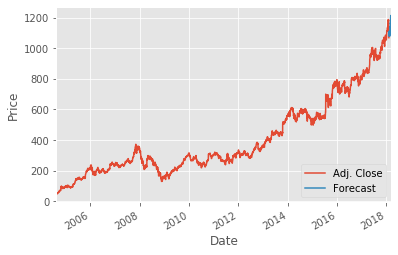

In [21]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#### d. Pickling and Scaling 

### Importance of Pickling:
- While our machine learning classifier takes a few seconds to train, there may be cases where it takes hours or even days to train a classifier. Imagine needing to do that every day you wanted to forecast prices, or whatever. This is not necessary, as we can just save the classifier using the Pickle module.

In [22]:
import pickle

In [23]:
# you can save any python object (like classifier) with pickle, do pickling after defining, training and testing the classifier

with open('linearregression.pickle','wb') as f:
    pickle.dump(clf, f)

In [24]:
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

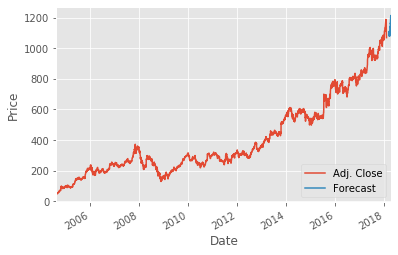

In [25]:
# Revamped Code if you consider the method of pickling 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#COMMENTED OUT:
##clf = svm.SVR(kernel='linear')
##clf.fit(X_train, y_train)
##confidence = clf.score(X_test, y_test)
##print(confidence)
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)


forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#### e. Regression Line

##### (a) Lets calculate gradient m first

In [26]:


# Formula to Calculating m (gradient) for the best fit line
Image(url= "https://pythonprogramming.net/static/images/machine-learning/best-fit-slope.png", width=300, height=300)

In [27]:
from statistics import mean
import numpy as np

##### Order of Operation in Python: PEMDAS

- P --> Parentheses first
- E --> Exponents (ie Powers and Square Roots, etc.)
- MD --> Multiplication and Division (left-to-right)
- AS --> Addition and Subtraction (left-to-right)

In [28]:
# Using Numpy Arrays so that we can perform matrix operations later
xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

def best_fit_slope(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)**2) - mean(xs**2)))
    return m

m = best_fit_slope(xs,ys)
print(m)

0.29999999999999893


In [29]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)

print(m,b)

0.29999999999999893 4.300000000000003


##### (b) Let's calculate intercept b next 

In [30]:
# Formula to Calculating m (gradient) for the best fit line
Image(url= "https://pythonprogramming.net/static/images/machine-learning/best-fit-y-intercept.png", width=300, height=300)

In [31]:
# Calculate the regression line 
# METHOD ONE
regression_line = [(m*x)+b for x in xs]

# METHOD TWO 
regression_line = []
for x in xs:
    regression_line.append((m*x)+b)

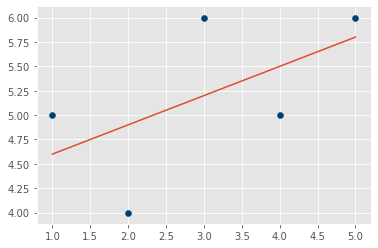

In [32]:
# PLOTTING THE BEST FIT LINE
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, regression_line)
plt.show()

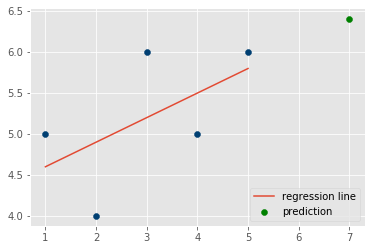

In [33]:
# Plotting the Best Fit Line together with Prediction Point
predict_x = 7
predict_y = (m*predict_x)+b

plt.scatter(predict_x, predict_y,color='g',label='prediction')
plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, regression_line, label='regression line')
plt.legend(loc=4)
plt.show()

#### f. Regression - R Squared and Coefficient of Determination Theory

#### (a) Sqaured Errors

- The standard way to check for errors is by using squared errors aka r squared or the coefficient of determination
- Definition: The distance between the regression line's y values, and the data's y values is the error, then we square that. The line's squared error is either a mean or a sum of this, we'll simply sum it.

In [34]:
# Illustration for r squared errors
Image(url= "https://pythonprogramming.net/static/images/machine-learning/squared-error-visual.png", width=300, height=300)

- Note that for best fit line approach, we are actually assuming it fulfill the idea for least squared errors
- Our best-fit line equation is the result of a proof that is used to discover the calculation for the best-fit regression line, where the regression line is the line that has the least squared error. 

###### Rationale for using Best Fit Line Approach 
- First, we want a way to normalize the error as a distance, so the error might be -5, but, when squared, that's a positive number. Another reason is to further punish for outliers. 

#### (b) Coefficient of Determination Theory or R Squared

In [35]:
Image(url= "https://pythonprogramming.net/static/images/machine-learning/coefficient-of-determination-r-squared.png", width=300, height=300)

The equation is essentially 1 minus the division of the squared error of the regression line and the squared error of the mean y line. The mean y line is quite literally the mean of all of the y values from the dataset. If you were to graph it, then it would be a flat, horizontal, line. Thus, we do the squared error of the average y, and of the regression line. The objective here is to discern how much of the error is actually just simply a result in variation in the data features, as opposed to being a result of the regression line being a poor fit.
- The higher the R value, the better the regression line

In [36]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

In [37]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [38]:
r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

0.3214285714285714


In most cases, if you care about predicting exact future values, r squared is indeed very useful. If you're interested in predicting motion/direction, then our best fit line is actually pretty good so far, and r squared shouldn't carry as much weight. 

**Analysis:**
- The coefficient of determination value is low as the variation in y was very large

#### g. Regression - Creating Sample Data for Testing

**Parameter Definition**

**hm** - The value will be "how much." This is how many datapoints that we want in the set. We could choose to have 10, or 10 million, for example.

**variance** - This will dictate how much each point can vary from the previous point. The more variance, the less-tight the data will be.

**step** - This will be how far to step on average per point, defaulting to 2.

**correlation** - This will be either False, pos, or neg to indicate that we want no correlation, positive correlation, or negative correlation.

In [39]:

def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step
            
    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys, dtype=np.float64)

In [40]:
xs, ys = create_dataset(40,40,2,correlation='pos')

In [41]:
xs,ys

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39.]),
 array([ 22., -35., -31., -22.,  -1., -19., -26.,  -3., -10.,  -9.,  15.,
         47.,  10.,  28., -11.,  19.,  71.,  52.,  75.,  53.,  20.,  27.,
         69.,  13.,  18.,  27.,  66.,  26.,  23.,  57.,  52.,  37.,  55.,
        101.,  56.,  59.,  63.,  70.,  48.,  45.]))

### Combined Code till now 

1294.1348030018764
1295.7750000000003
0.001265803861105419


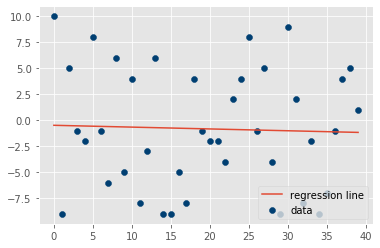

In [42]:
from statistics import mean
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


def create_dataset(hm,variance,step=2,correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step

    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)

    return m, b


def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]

    squared_error_regr = sum((ys_line - ys_orig) * (ys_line - ys_orig))
    squared_error_y_mean = sum((y_mean_line - ys_orig) * (y_mean_line - ys_orig))

    print(squared_error_regr)
    print(squared_error_y_mean)

    r_squared = 1 - (squared_error_regr/squared_error_y_mean)

    return r_squared


xs, ys = create_dataset(40,10,2,correlation=False)
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]
r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

plt.scatter(xs,ys,color='#003F72', label = 'data')
plt.plot(xs, regression_line, label = 'regression line')
plt.legend(loc=4)
plt.show()

In [43]:
# Test the above chunk of code by making the following changes
xs, ys = create_dataset(40,10,2,correlation='pos')
xs, ys = create_dataset(40,10,2,correlation='neg')
xs, ys = create_dataset(40,10,2,correlation=False)

#### Conclusion from the above analysis
- Less variance should result in higher r-squared/coefficient of determination, higher variance = lower r squared. What about no correlation? This should be even lower, and actually quite close to zero, unless we get a crazy random permutation that actually has correlation anyway


# (B) Classification Problem

#### Two Major Classification Algorithms: K Nearest Neighbours and Support Vector Machine 
- Supervised Learning
- Have prior-labeled data for training

### (a) K Nearest Neighbors

- Simple and effective machine learning classification algorithm
- K refers to the number you can choose
- Neighbors are data points from known data 
- Due to the nature of the vote, likely that you want an odd number for K, otherwiese will be 50/50 split situation
- if you wanna have even no for K, then apply wieghts to the distance to penalize for greater distances

##### Scikit-learn Algorithm for K Nearest Neighbors for Breast Cancer Data

In [44]:
# Inepsect Missing and Bad Data
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn import preprocessing, neighbors
import pandas as pd
import os

In [65]:
# check current directory 
os.getcwd() 

'/Users/user/Documents/GitHub/data_science_learning_journey/programming_notes/data'

In [66]:
os.chdir(r'/Users/user/Documents/GitHub/data_science_learning_journey/programming_notes/data')

In [76]:
df = pd.read_csv('breast-cancer-wisconsin.data')
# Fill in missing values with extreme data
df.replace('?',-99999, inplace=True)
# Drop id column as it is not very effective for classifying (i.e. meaningless)
df.drop(['id_no'], 1, inplace=True)

In [77]:
df.isnull().sum()

clump_thickness         0
uniform_cell_size       0
uniform_cell_shape      0
marginal_adhesion       0
single_epi_cell_size    0
bare_nuclei             0
bland_chromation        0
normal_nucleoli         0
mitoses                 0
class                   0
dtype: int64

In [78]:
# Define Features X and Label Y 
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

In [79]:
# Create Training and Testing Samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [80]:
# Define the classifier 
clf = neighbors.KNeighborsClassifier()

Link for classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [81]:
# Train classifier 
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [83]:
# Test and Find the Accuracy
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9642857142857143


In [84]:
example_measures = np.array([4,2,1,1,1,2,3,2,1])
example_measures = example_measures.reshape(1, -1)
prediction = clf.predict(example_measures)
print(prediction)

[2]


In [85]:
# When we have multiple samples
example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

[2 2]


#### Euclidean Distance Theory

- K Nearest Neighbors boils down to promixity, not by group, but by individual points
- What the algo does is to compute distance bet points, then pick the most popular class of the top K classes of pts nearest to it
- Most of the distance calculation is based on Euclidean Distance (named after Euclid, a famous mathematician)

In [86]:
# Formula of Euclidean Distance
Image(url= "https://pythonprogramming.net/static/images/machine-learning/euclidean-distance.png", width=300, height=300)

- square root of the sum of the distance of the points from each other, sqaured 

In [87]:
plot1 = [1,3]
plot2 = [2,5]
euclidean_distance = sqrt( (plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2 )

In [88]:
euclidean_distance

2.23606797749979

#### Creating K Nearest Neighbors Classifier From Scratch

In [89]:
# Environmental Set Up for Visualization
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')

- Use warnings to avoid using a lower K value than we have groups
- Math for square root functiojnality 
- Counter from collections to get the most popular votes
- Note: Scikit-Learn require you to use numbers, but you do not inherently actually need to use numbers for your classes wiht a K Nearest Neighbors classifier

In [90]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

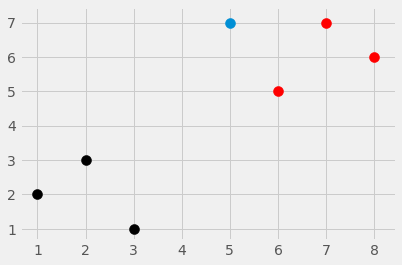

In [91]:
# Plotting the points inside the dataset before Classification

[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset] 
# alternative code for above
# for i in dataset:
#     for ii in dataset[i]:
#         plt.scatter(ii[0],ii[1], s=100, color=i)

# Plotting the points in new_features
plt.scatter(new_features[0], new_features[1], s=100)

plt.show()

In [92]:
def k_nearest_neighbors(data, predict, k=3):
    # set warning if the user attempt to use the K Nearest Neighbors function to vote for nearest neirghbors selected is less than or equal to no of groups that can vote
    if len(data) > k:
        warnings.warn('K is set to a value less than total voting groups!')
    
    distances = []
    for group in data:
        for features in data[group]:
            # using normal method
            # euclidean_distance = sqrt((features[0]-predict[0]**2 + (features[1]-predict[1])**2))
            
            # using numpy function
            # euclidean_distance = np.sqrt(np.sum((np.array(features)-np.array(predict))**2))
            
            # using norm function in numpy 
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            
            # Euclidean Distance is the name for measuring the length of a line segment between points. 
            # Euclidean Norm measures the magnitude of a vector. Magnitude of a vector is basically the length
            distances.append([euclidean_distance,group])
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

In [93]:
result = k_nearest_neighbors(dataset, new_features)
print(result)

r


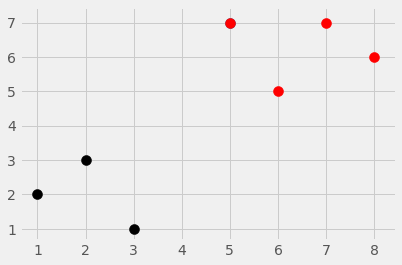

In [94]:
# Plotting the points inside the dataset after Classification

[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
# same as:
##for i in dataset:
##    for ii in dataset[i]:
##        plt.scatter(ii[0],ii[1],s=100,color=i)
        
plt.scatter(new_features[0], new_features[1], s=100)

result = k_nearest_neighbors(dataset, new_features)
plt.scatter(new_features[0], new_features[1], s=100, color = result)  
plt.show()

#### Testing our K Nearest Neighbors classifier on breast cancer dataset

In [95]:
df = pd.read_csv('breast-cancer-wisconsin.data')
# replace question mark
df.replace('?',-99999, inplace=True)
# drop id column
df.drop(['id_no'], 1, inplace=True)
# convert all column to float (as some numerical data points appear as string datatype)
full_data = df.astype(float).values.tolist()

In [96]:
# Shuffle the data 
random.shuffle(full_data)

# Choose test size percentage
test_size = 0.2

# Prepare dictionaries for training and testing set to be populated
# 2 refers to benign tumors (same value as the actual dataset used)
# 4 refers to the malignant tumors (same as the data)
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}

# Specify which is the train_data and which is the test_data
# We do this by selecting the first 80% as train_data (by doing logic that says to slice the list up to the last 20%),
# and then we create the test_data by slicing the final 20% of the shuffled data.
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
        # k = 5 as 5 is the default for Scikit Learn KNeighborsClassifier
        if group == vote:
            correct += 1
        total += 1
print('Accuracy:', correct/total)

Accuracy: 0.9640287769784173


#### Evaluation on K Nearest Neighbors Classifier
link : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

**Pros:**
1. very useful since it performs well on both linear and non-linear data
    
**Cons:**
1. Unable to scale: speed for performing operations: the main issue with this objective is that, per datapoint, you have to compare it to every single datapoint to get the distances, thus the algorithm just doesn't scale well, despite being fairly reliable accuracy-wise.
2. Unable to work with outliers
3. Unable to work with any bad data

### (b) Support Vector Machine

- The objective of the Support Vector Machine is to find the best splitting boundary between data. In two dimensional space, you can think of this like the best fit line that divides your dataset. With a Support Vector Machine, we're dealing in vector space, thus the separating line is actually a separating hyperplane. The best separating hyperplane is defined as the hyperplane that contains the "widest" margin between support vectors. The hyperplane may also be referred to as a decision boundary. 
- What the Support Vector Machine aims to do is, one time, generate the "best fit" line (but actually a plane, and even more specifically a hyperplane!) that best divides the data. Once this hyperplane is discovered, we refer to it as a decision boundary. We do this, because, this is the boundary between being one class or another. 



**Pros:**
1. Able to scale (shorter processing time): Once we calculate this decision boundary, we never need to do it again, unless of course we are re-training the dataset. Thus, this algorithm is going to scale, unlike the KNN classifier.
    
**Cons:**
1. this method of learning is only going to work natively on linearly-separable data.
2. High complexity (require features to be highly optimized) due to quadratic problem solving

In [97]:
# Formal SVm Constraint Optimization Problem Equation
Image(url= "https://pythonprogramming.net/static/images/machine-learning/svm-formal-optimization.png", width=600, height=600)

- SVM optimization problem is a convex problem (the convex shape is the magnitude of vector w)
- finding global minimum (instead of local minimum)
- Hence SVM is a **CONVEX OPTIMIZATION** problem
- Libraries to solve Quadratic Optimization Problem: **CVXOPT or Scikit Learn or LibSVM**
- Link for **CVXOPT:** http://cvxopt.org/
- Link for **LibSVM:** https://www.csie.ntu.edu.tw/~cjlin/libsvm/
- Link for **Optimization Math**: https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf
- Link for **Constrained Optimization & Language Multiplier Methods**: http://www.mit.edu/~dimitrib/Constrained-Opt.pdf

#### Using SVM Package under SKLearn

In [98]:
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = svm.SVC()

clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

example_measures = np.array([[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

0.9428571428571428
[2]


/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### Building SVM Package from Scratch

In [99]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

In [100]:
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

In [101]:
data_dict

{-1: array([[1, 7],
        [2, 8],
        [3, 8]]), 1: array([[ 5,  1],
        [ 6, -1],
        [ 7,  3]])}

- The **fit method** will be used to train our SVM. This will be the optimization step. 
- The **predict method** will predict the value of a new featureset once we've trained the classifier, which is just the sign(x.w+b) once we know what w and b are.
- **np.dot**: return dot product
- **np.sign**:  if array value is greater than 0 it returns 1, if array value is less than 0 it returns -1, and if array value 0 it returns 0.

In [102]:
class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        # pass the data which will be used to train against / optimize with
        self.data = data
        # build an optimization dict as opt_dict which contain optimization values
        opt_dict = {}
        # The dictionary will be { ||w|| : [w,b] }. 
        # When we're all done optimizing, we'll choose the values of w and b for whichever one in the dictionary has the lowest key value (which is ||w||)
        
        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]
        # find values range 
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        
        # no need to keep this memory
        all_data = None
        
        # work on step sizes for w
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                     # starts getting very high cost after this
                      self.max_feature_value * 0.001]
        
        # step sizes for b 
        ## extremely expensive 
        b_range_multiple = 5 
        b_multiple = 5 
        latest_optimum = self.max_feature_value*10
        
        # start stepping
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            # we can do this coz of convex
            ## To begin, we'll set optimized to False, and we'll reset this for each major step. The optimized var will be true when we have checked all steps down to the base of the convex shape (our bowl).
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                            
                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2

        
        
    def predict(self,features):
        # classifiction is just:
        # sign(xi.w+b)
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        # if the classification isn't zero, and we have visualization on, we graph
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0],features[1],s=200,marker='*', c=self.colors[classification])
        else:
            print('featureset',features,'is on the decision boundary')
        return classification
    
    def visualize(self):
        #scattering known featuresets.
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')

        plt.show()
        

Optimized a step.
Optimized a step.
Optimized a step.


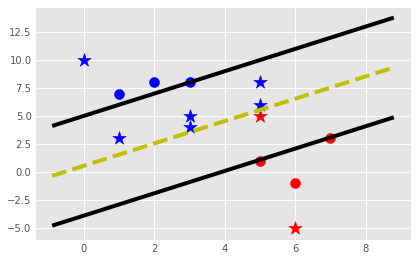

In [103]:
svm = Support_Vector_Machine()
svm.fit(data=data_dict)

predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]

for p in predict_us:
    svm.predict(p)

svm.visualize()

#### SVM: Kernel 

- Kernels allows us to add additional dimensions to SVM without paying the processing costs to do it
- Kernels requirement: rely on inner products (i.e. dot products)
- help us translate our data to a plausibly infinite number of dimensions in order to find one that has linear separability. 
- We also learned that kernels can let us go out to these dimensions without actually paying the cost for these higher dimensions. 

In [104]:
# Definition of Kernels
Image(url= "https://pythonprogramming.net/static/images/machine-learning/kernel-first-look.png", width=300, height=300)

In [105]:
# Kernels lead to addition of new dimensions
Image(url= "https://pythonprogramming.net/static/images/machine-learning/z-values-kernel-function-of-x.png", width=300, height=300)

In [106]:
# The default kernal we use is Radial Basis Function (RBF) kernal 
# able to propose infinite no of dimensions 
Image(url= "https://pythonprogramming.net/static/images/machine-learning/radial-basis-function-kernel.png", width=300, height=300)

#### Soft Margin Support Vector Machine

**Why Soft-margin Classifier more superior?**
1. your data is not perfectly linearlly separable (but it is very close and it makes more sense to continue using the default linearly kernel)
2. even if kernel is used, you may end up with over-fitting siginificantly if you use a hard-margin

**Why overfitting occurs?**

In [107]:
Image(url= "https://pythonprogramming.net/static/images/machine-learning/hard-margin-with-many-support-vectors.png", width=400, height=400)

In this case, every single data sample for the positive class is a support vector, and only two of the negative class aren't support vectors. This signals to use a high chance of overfitting having happened. 

**How to prevent overfitting?**

In [108]:
Image(url= "https://pythonprogramming.net/static/images/machine-learning/linear-soft-margin-example.png", width=400, height=400)

We have a couple errors or violations noted by arrows, but this is likely to classify future featuresets better overall. What we have here is a "soft margin" classifier, which allows for some "slack" on the errors that we might get in the optimization process.

In [109]:
Image(url= "https://pythonprogramming.net/static/images/machine-learning/introducing-slack-soft-margin.png", width=400, height=400)

Our new optimization is the above calculation, where slack is greater than or equal to zero. The closer to 0 the slack is, the more "hard-margin" we are. The higher the slack, the more soft the margin is. If slack was 0, then we'd have a typical hard-margin classifier.

**Our objective is to minimize slack**

In [110]:
Image(url= "https://pythonprogramming.net/static/images/machine-learning/new-svm-minimization-vector-w-slack.png", width=400, height=400)

**Explanation:** we actually want to minimize 1/2||w||^2 + (C * The sum of all of the slacks used).With that, we brough in yet another variable, C. C is a multiplier for the "value" of how much we want slack to affect the rest of the equation. The lower C, the less important the sum of the slacks is in relation to the magnitude of vector w, and visa versa. In most cases, C will be defaulted to 1.

**Incoporating a Soft Margin, Kernels and CVXOPT**

- CVXOPT Quardratic Programming Docs: https://cvxopt.org/userguide/coneprog.html#quadratic-programming
- CVXOPT Quadratic Programming Example: https://cvxopt.org/examples/tutorial/qp.html

     pcost       dcost       gap    pres   dres
 0:  1.3465e+05 -8.6203e+07  2e+08  5e-01  5e-12
 1:  3.9665e+05 -1.4879e+07  2e+07  4e-02  8e-12
 2:  3.0235e+05 -2.8258e+06  4e+06  6e-03  3e-12
 3:  5.9444e+04 -4.8345e+05  6e+05  5e-04  3e-12
 4: -2.2202e+03 -7.9858e+04  8e+04  4e-05  2e-12
 5: -6.0770e+03 -3.1055e+04  3e+04  8e-06  2e-12
 6: -6.9978e+03 -2.9711e+04  2e+04  7e-06  2e-12
 7: -7.5476e+03 -2.7925e+04  2e+04  6e-06  2e-12
 8: -8.0316e+03 -1.9688e+04  1e+04  5e-07  3e-12
 9: -8.2091e+03 -1.9298e+04  1e+04  5e-07  2e-12
10: -7.7433e+03 -1.8740e+04  1e+04  4e-07  3e-12
11: -8.2194e+03 -1.4216e+04  6e+03  2e-07  3e-12
12: -9.5060e+03 -1.3067e+04  4e+03  4e-08  3e-12
13: -1.0531e+04 -1.1131e+04  6e+02  4e-09  4e-12
14: -1.0515e+04 -1.1096e+04  6e+02  4e-09  3e-12
15: -1.0641e+04 -1.0798e+04  2e+02  7e-10  3e-12
16: -1.0696e+04 -1.0720e+04  2e+01  1e-10  4e-12
17: -1.0702e+04 -1.0713e+04  1e+01  4e-11  4e-12
18: -1.0705e+04 -1.0708e+04  4e+00  3e-12  4e-12
19: -1.0706e+04 -1.07

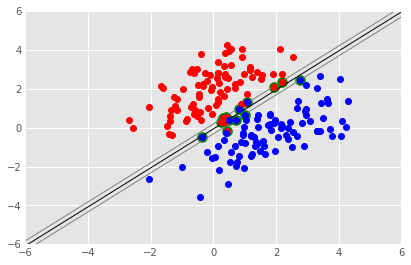

In [111]:
# Mathieu Blondel, September 2010
# License: BSD 3 clause
# http://www.mblondel.org/journal/2010/09/19/support-vector-machines-in-python/

# visualizing what translating to another dimension does
# and bringing back to 2D:
# https://www.youtube.com/watch?v=3liCbRZPrZA

# Docs: http://cvxopt.org/userguide/coneprog.html#quadratic-programming
# Docs qp example: http://cvxopt.org/examples/tutorial/qp.html

# Nice tutorial:
# https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf


             
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

class SVM(object):

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

if __name__ == "__main__":
    import pylab as pl

    def gen_lin_separable_data():
        # generate training data in the 2-d case
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[0.8, 0.6], [0.6, 0.8]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def gen_non_lin_separable_data():
        mean1 = [-1, 2]
        mean2 = [1, -1]
        mean3 = [4, -4]
        mean4 = [-4, 4]
        cov = [[1.0,0.8], [0.8, 1.0]]
        X1 = np.random.multivariate_normal(mean1, cov, 50)
        X1 = np.vstack((X1, np.random.multivariate_normal(mean3, cov, 50)))
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 50)
        X2 = np.vstack((X2, np.random.multivariate_normal(mean4, cov, 50)))
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def gen_lin_separable_overlap_data():
        # generate training data in the 2-d case
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[1.5, 1.0], [1.0, 1.5]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def split_train(X1, y1, X2, y2):
        X1_train = X1[:90]
        y1_train = y1[:90]
        X2_train = X2[:90]
        y2_train = y2[:90]
        X_train = np.vstack((X1_train, X2_train))
        y_train = np.hstack((y1_train, y2_train))
        return X_train, y_train

    def split_test(X1, y1, X2, y2):
        X1_test = X1[90:]
        y1_test = y1[90:]
        X2_test = X2[90:]
        y2_test = y2[90:]
        X_test = np.vstack((X1_test, X2_test))
        y_test = np.hstack((y1_test, y2_test))
        return X_test, y_test

    def plot_margin(X1_train, X2_train, clf):
        def f(x, w, b, c=0):
            # given x, return y such that [x,y] in on the line
            # w.x + b = c
            return (-w[0] * x - b + c) / w[1]

        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

        # w.x + b = 0
        a0 = -4; a1 = f(a0, clf.w, clf.b)
        b0 = 4; b1 = f(b0, clf.w, clf.b)
        pl.plot([a0,b0], [a1,b1], "k")

        # w.x + b = 1
        a0 = -4; a1 = f(a0, clf.w, clf.b, 1)
        b0 = 4; b1 = f(b0, clf.w, clf.b, 1)
        pl.plot([a0,b0], [a1,b1], "k--")

        # w.x + b = -1
        a0 = -4; a1 = f(a0, clf.w, clf.b, -1)
        b0 = 4; b1 = f(b0, clf.w, clf.b, -1)
        pl.plot([a0,b0], [a1,b1], "k--")

        pl.axis("tight")
        pl.show()

    def plot_contour(X1_train, X2_train, clf):
        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

        X1, X2 = np.meshgrid(np.linspace(-6,6,50), np.linspace(-6,6,50))
        X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
        Z = clf.project(X).reshape(X1.shape)
        pl.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')

        pl.axis("tight")
        pl.show()

    def test_linear():
        X1, y1, X2, y2 = gen_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM()
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_margin(X_train[y_train==1], X_train[y_train==-1], clf)

    def test_non_linear():
        X1, y1, X2, y2 = gen_non_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM(polynomial_kernel)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

    def test_soft():
        X1, y1, X2, y2 = gen_lin_separable_overlap_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM(C=1000.1)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

        
    #test_linear()
    #test_non_linear()
    test_soft()


**Evaluation:**
- Most of the time you will use LibSVM package instead of CVXOPT for SVM Optimization

#### Running SVM when you have more than two groups to classify

Method: One Verse Rest / OVR
- The idea here is you separate each group from the rest. For example, to classify three separate groups (1, 2, and 3), you would start by separating 1 from 2 and 3. Then you would separate 2 from 1 and 3. Then finally separate 3 from 1 and 2. 
- **Evaluation**: things like confidence may be different per classification boundary, also the separation boundaries may be slightly flawed since there are almost always going to be more negatives than positives, since you're maybe comparing one group to three others. end up with **unbalanced calssification boundary** as shown below

In [112]:
Image(url= "https://pythonprogramming.net/static/images/machine-learning/one-vs-rest-svm.png", width=400, height=400)

Method: One vs One (OVO)
- In this case, consider you have three total groups. The way this works is you have a specific boundary that separates 1 from 3 and 1 from 2, and this process repeats for the rest of the classes
- **Evaluation**: the boundaries maybe more balanced

In [113]:
Image(url= "https://pythonprogramming.net/static/images/machine-learning/one-vs-one-svm.png", width=400, height=400)

**Parameters:**
1. value for c: default value is 1 
2. Choice of kernel: The default here is the rbf kernel, but you can also just have a linear kernel, a poly (for polynomial), sigmoid, or even a custom one of your choosing or design.
3. Degree Value: defaulting to 3, which is just the degree of the polynomial, if you are using the poly value for the kernel
4. Gamma: where you can set the gamma value for the rbf kernel. You should leave this as auto.
5. Coef0: allows you to adjust the independent term in your kernel function, but you should also leave this alone most likely, and it is only used in the polynomial and sigmoid kernels.
6. Probability: can use this probability parameter to enable a form of one. This is a costly functionality, but may be important enough to you to enable it, otherwise the default is False.
7. Shrinking Boolean: default is true. This has to do with whether or not you want a shrinking heuristic used in your optimization of the SVM, which is used in Sequential Minimal Optimization (SMO). You should leave this True, as it should greatly improve your performance, for very little loss in terms of accuracy in most cases.
8. Tol Paramter:  setting for the SVM's tolerance in optimization. Recall that yi(xi.w+b)-1 >= 0. For an SVM to be valid, all values must be greater than or equal to 0, and at least one value on each side needs to be "equal" to 0, which will be your support vectors. Since it is highly unlikely that you will actually get values equal perfectly to 0, you set tolerance to allow a bit of wiggle room. The default tol with Scikit-Learn's SVM is 1e-3, which is 0.001.
9. max_tier: where you can set a maximum number of iterations for the quadratic programming problem to cycle through to optimize. The default is -1, which means there is no limit.
10. decision_function_shape: one-vs-one (ovo) or one-vs-rest (ovr)
11. random_state: used for a seed in the probability estimation, if you wanted to specify it.

**Attributes:**
1. support_ gives you the index values for the support vectors. 
2. support_vectors_ are the actual support vectors. 
3. n_support_ will tell you how many support vectors you have, which is useful for comparing to your dataset size to determine if you may have some statistical issues. 
4. The last 3 parameters dual_coef_, coef_, and intercept_ will be useful if you plan to graph the SVM, for example.


# (C) Clustering Problem - Unsupervised Machine Learning

**Two forms of clustering: flat or hierarchical**

**Why and When do we use clustering in machine learning?**

1. The objective of clustering is to find relationships and meaning in data. In most cases that I have personally seen, people use clustering mostly as a step in what's known as **"semi-supervised" machine learning**. The idea here is you might use clustering to define classes, and then use a supervised machine learning algorithm to do further classification. 

2. Another use is for **feature selection and validation**. For example, consider our Breast Cancer dataset that we've been using. We might believe the features we've chosen are indeed descriptive and meaningful. One option we have is to feed this data through a K Means algorithm, and then indeed see whether or not the two groups we thought we were tracking were actually described by the data in a way we expected. Consider next that you're a data scientist for Amazon. Your CTO has data collected that they believe could be used to predict whether or not customers are buyers or non-buyers. They want you to use K-Means to see if K-Means correctly organizes the customers by the data that the CTO thinks is meaningful. What about Hierarchical Clustering? Consider you're still the same data scientist for Amazon. This time, you run the seemingly meaningful data through a hierarchical clustering algorithm, such as Mean Shift, and you actually get 5 groups. After further analysis, you realize visitors aren't actually just buyers and non-buyers, they are a spectrum! You really have non-buyers, unlikely-to-buyers, slightly-to-buyers, highly-likely-to-buyers, and certain-to-buyers.
3. **Used on truly unknown data to find structure**: Consider you're an alien race first discovering human texts in North America. You might take all of the written characters you find and compile them into a big list of features. Then you might feed this list through a Hierarchical Clustering algorithm just to see if you can find specific groups so that you can start to decode the language by characters.
4. **clustering can also be used for typical classification**, you just don't actually need to feed it what the classifications are beforehand


##### (1) K Means Clustering

1. Take entire dataset, and set, randomly, K number of centroids. Centroids are just the "centers" of your clusters. To start, I typically just take the first K values in my dataset and have those as the start, but you could also randomly select them if you wanted. It should not matter, but, if you are not optimizing for some reason, it may make sense to try to shuffle the data and try again.
2. Calculate distance of each featureset to the centroids, and classify each featureset as the centroid class closest to it. Centroid classes are arbitrary, you will likely just call the first centroid 0, the second centroid 1...and so on.
3. Once you have classified all data, now you take the "mean" of the groups, and set the new centroids as the mean of their associated groups.
4. Repeat #2 and #3 until you are optimized. Typically, you measure optimization by movement of the centroid. There are many ways to do this, we're just going to use percent change.

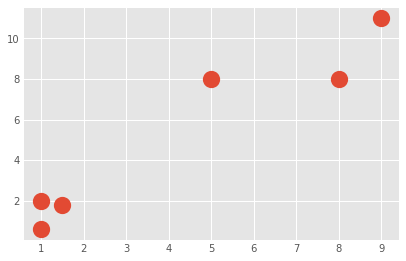

In [114]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
style.use('ggplot')

#ORIGINAL:

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])


plt.scatter(X[:, 0],X[:, 1], s=150, linewidths = 5, zorder = 10)
plt.show()

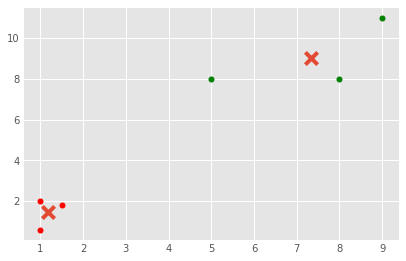

In [115]:
clf = KMeans(n_clusters=2)
clf.fit(X)
centroids = clf.cluster_centers_
labels = clf.labels_
colors = ["g.","r.","c.","y."]
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.show()

**Dealing with Non-Numerical Elements**

In [135]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
style.use('ggplot')

In [147]:
os.chdir(r'/Users/user/Documents/GitHub/data_science_learning_journey/programming_notes/data//')

In [148]:
titanic_data = pd.read_excel('titanic.xls')

In [149]:
print(titanic_data.head())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [150]:
titanic_data.drop(['body','name'], 1, inplace=True)
#titanic_df.convert_objects(convert_numeric=True)
titanic_data.fillna(0, inplace=True)
print(titanic_data.head())

   pclass  survived     sex      age  sibsp  parch  ticket      fare    cabin  \
0       1         1  female  29.0000      0      0   24160  211.3375       B5   
1       1         1    male   0.9167      1      2  113781  151.5500  C22 C26   
2       1         0  female   2.0000      1      2  113781  151.5500  C22 C26   
3       1         0    male  30.0000      1      2  113781  151.5500  C22 C26   
4       1         0  female  25.0000      1      2  113781  151.5500  C22 C26   

  embarked boat                        home.dest  
0        S    2                     St Louis, MO  
1        S   11  Montreal, PQ / Chesterville, ON  
2        S    0  Montreal, PQ / Chesterville, ON  
3        S    0  Montreal, PQ / Chesterville, ON  
4        S    0  Montreal, PQ / Chesterville, ON  


In [151]:
# Iterate through the dataframes to find unique elements for those columns that are not numerical
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digits_vals = {}
        
        # embedded function that converts paramter value to value of that item(as a key)
        def convert_to_int(val):
            return text_digits_vals[val]
        
        # check if the column is either an np.int64 or np.float63
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            # if not ingeger, convert column to list of its vlues, take set of the column to take unique values 
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            
            # for each of the unique elements found, create a new dictionary key that is that unique element
            x = 0 
            for unique in unique_elements:
                if unique not in text_digits_vals:
                    text_digits_vals[unique] = x 
                    x+=1
            
            # use mapping to map the function we created before to pd column
            df[column] = list(map(convert_to_int, df[column]))
    return df

In [152]:
df = handle_non_numerical_data(titanic_data)
print(df)

      pclass  survived  sex      age  sibsp  parch  ticket      fare  cabin  \
0          1         1    0  29.0000      0      0     767  211.3375    108   
1          1         1    1   0.9167      1      2     526  151.5500     78   
2          1         0    0   2.0000      1      2     526  151.5500     78   
3          1         0    1  30.0000      1      2     526  151.5500     78   
4          1         0    0  25.0000      1      2     526  151.5500     78   
...      ...       ...  ...      ...    ...    ...     ...       ...    ...   
1304       3         0    0  14.5000      1      0     587   14.4542      0   
1305       3         0    0   0.0000      1      0     587   14.4542      0   
1306       3         0    1  26.5000      0      0     569    7.2250      0   
1307       3         0    1  27.0000      0      0     247    7.2250      0   
1308       3         0    1  29.0000      0      0     527    7.8750      0   

      embarked  boat  home.dest  
0            3   

**K Means Clustering with Titanic Dataset**

- Performing clustering for 2 clusters

In [153]:
df.drop(['sex','boat'], 1, inplace=True)
X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X) #important step in data preprocessing
y = np.array(df['survived'])

clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

- Checking the accuracy level based on the no of correct prediction

In [154]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.6883116883116883


**Building K-Means from Scratch**
- Choose value for K
- Randomly select K featuresets to start as your centroids
- Calculate distance of all other featuresets to centroids
- Classify other featuresets as same as closest centroid
- Take mean of each class (mean of all featuresets by class), making that mean the new centroid
- Repeat steps 3-5 until optimized (centroids no longer moving)

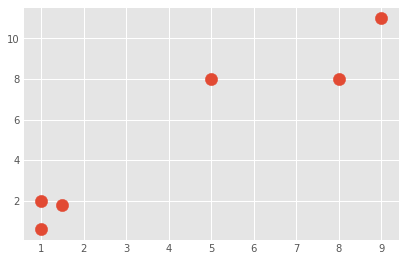

In [160]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

In [161]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300): # 2 Clusters are chosen
        self.k = k # no of clusters
        self.tol = tol # tolerance value, not optimized if the centroid is not moving more than the tolerance value
        self.max_iter = max_iter # limit the no of cycles we are willing to run 
    
    # Centroid Assignment
    def fit(self,data):
        
        self.centroids = {}
        
        for i in range(self.k): # choose the first two datapoints as the initial centroids (or can choose the shuffle the data)
            self.centroids[i] = data[i] 
            
        for i in range(self.max_iter): # begin iterating through max_tier value
            
            # start with empty classifications, and then create two dict keys (by iterating through range of self.k)
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []
                
            # iterate through our features, calculate distances of the features to the current centroids, and classify them 
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                
            # create the new centroids, as well as measuring the movement of the centroids. If that movement is less than our tolerance (self.tol), then we're all set. 
            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
                
            # start off assuming we are optimized. We then take all of the centroids, and compare them to the previous centroids. If they are within our required tolerance, then we're happy. If not, then we set optimized to False and we continue 
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break
    # Prediction          
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

453.3333333333334
102.72108843537411


ValueError: 'color' kwarg must be an mpl color spec or sequence of color specs.
For a sequence of values to be color-mapped, use the 'c' argument instead.

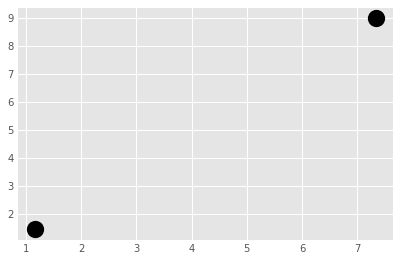

In [167]:
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()